In [41]:
#!pip install xgboost

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error,classification_report, roc_curve 

import re
from functools import reduce
from collections import Counter
from imputation import find_baths, find_bedrooms, find_beds, data_imputation,hrt_pred, reduce_groups,get_n_1_dummies,get_n_dummies
import pickle

pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

%matplotlib inline

In [2]:
encoded_data=get_n_dummies()

# Regression Tree

In [3]:
X=encoded_data.drop(['Success_rate'],axis=1)
Y=round(encoded_data['Success_rate'],4)

#train, valid & test test split
X_train,X_valid,Y_train,Y_valid=train_test_split(X,Y,test_size=0.2,random_state=1)
X_train.shape,X_valid.shape

((5072, 74), (1268, 74))

In [4]:
model = RandomForestRegressor()
model.fit(X_train, Y_train)
Y_pred_valid = model.predict(X_valid)

In [5]:
print('Root Mean squared error: {0:0.4f}'.format(mean_squared_error(Y_valid,Y_pred_valid,squared=False)))

Root Mean squared error: 0.2756


In [6]:
df=pd.DataFrame({'Y_valid_actual':Y_valid,'Y_prediction':Y_pred_valid})
df

,Y_valid_actual,Y_prediction
607,0.0417,0.383839
1812,1.0000,0.676684
354,0.0500,0.548685
1620,1.0000,0.934413
1073,0.0500,0.434840
4727,1.0000,0.659412
2801,0.1691,0.270558
5176,0.4858,0.652991
200,0.6879,0.650595
3127,1.0000,0.740780


# Classification Tree

In [7]:
for i in encoded_data.index:
    if encoded_data.loc[i,'Success_rate']>0.50:
        encoded_data.loc[i,'Successful']=1
    else:
        encoded_data.loc[i,'Successful']=0
encoded_data.drop(['Success_rate'],axis=1,inplace=True)
encoded_data['Successful'].value_counts()

0.0    3285
1.0    3055
Name: Successful, dtype: int64

In [8]:
X=encoded_data.drop(['Successful'],axis=1)
Y=encoded_data['Successful']

#train, valid & test test split
X_train,X_valid,Y_train,Y_valid=train_test_split(X,Y,test_size=0.2,random_state=1)

In [9]:
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier(n_estimators=64, criterion='entropy',random_state=0)
model.fit(X_train,Y_train)
Y_pred_valid=model.predict(X_valid)

In [11]:
print(classification_report(Y_valid, Y_pred_valid))

              precision    recall  f1-score   support

         0.0       0.71      0.76      0.74       627
         1.0       0.75      0.69      0.72       641

    accuracy                           0.73      1268
   macro avg       0.73      0.73      0.73      1268
weighted avg       0.73      0.73      0.73      1268



In [12]:
df=pd.DataFrame({'Y_valid_actual':Y_valid,'Y_prediction':Y_pred_valid})
for i in df.index:
    if df.loc[i,'Y_valid_actual']==df.loc[i,'Y_prediction']:
        df.loc[i,'Prediction']='True'
    else:
        df.loc[i,'Prediction']='False'

In [13]:
df.loc[df['Prediction']=='False',:]

,Y_valid_actual,Y_prediction,Prediction
5176,0.0,1.0,False
5238,0.0,1.0,False
250,1.0,0.0,False
1321,0.0,1.0,False
4406,1.0,0.0,False
2275,1.0,0.0,False
4290,0.0,1.0,False
1941,1.0,0.0,False
4140,1.0,0.0,False
929,0.0,1.0,False


# VARIABLE IMPORTANCE SCORE

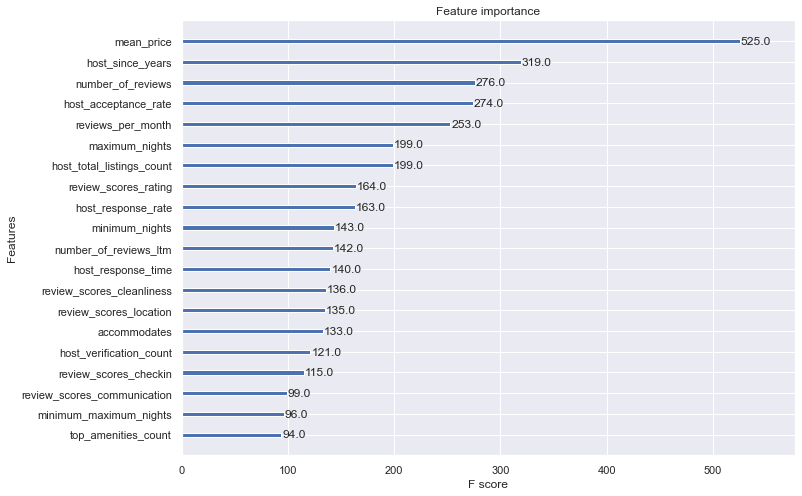

In [24]:
model=XGBRegressor()
model.fit(X,Y)

sns.set(rc={'figure.figsize':(11,8)})
plot_importance(model, max_num_features=20) # top 10 most important features
plt.show()

In [25]:
model = XGBRegressor()
model.fit(X, Y)

filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))